In [160]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np
import json
import warnings
warnings.filterwarnings('ignore')

In [118]:
df = pd.DataFrame([], columns = ['Care' , 'Value', 'Gender' , 'Network Measure', 'Interaction', 'File'])
print(df)

Empty DataFrame
Columns: [Care, Value, Gender, Network Measure, Interaction, File]
Index: []


In [119]:
def extract_data(female_files, male_files, network_measure_func, measure, interaction):

    d_female = {}
    d_female_measure = {}
    for i in range(len(female_files)):
        d_female["group" + str(i) + "_female"] = nx.read_gml(female_files[i])
        if measure == "Clustering Centrality":
            d_female_measure["group" + str(i) + "_female"] = network_measure_func((d_female["group" + str(i) + "_female"]).to_undirected())
            for key, value in  network_measure_func((d_female["group" + str(i) + "_female"].to_undirected())).items():
                df.loc[len(df)]=[key, value, "Female", measure, interaction, female_files[i]] 
        else:
            d_female_measure["group" + str(i) + "_female"] = network_measure_func(d_female["group" + str(i) + "_female"])
            for key, value in  network_measure_func(d_female["group" + str(i) + "_female"]).items():
                df.loc[len(df)]=[key, value, "Female", measure, interaction, female_files[i]] 
             
    d_male = {}
    d_male_measure = {}
    for i in range(len(male_files)):
        d_male["group" + str(i) + "_male"] = nx.read_gml(male_files[i])
        if measure == "Clustering Centrality":
            d_male_measure["group" + str(i) + "_male"] = network_measure_func((d_male["group" + str(i) + "_male"]).to_undirected())
            for key, value in  network_measure_func((d_male["group" + str(i) + "_male"]).to_undirected()).items():
                df.loc[len(df)]=[key, value, "Male", measure, interaction, female_files[i]] 
        else:
            d_male_measure["group" + str(i) + "_male"] = network_measure_func(d_male["group" + str(i) + "_male"])
            for key, value in  network_measure_func(d_male["group" + str(i) + "_male"]).items():
                df.loc[len(df)]=[key, value, "Male", measure, interaction, female_files[i]] 
    
    df.to_csv("all_data_measures.csv", encoding='utf-8', index=False)    

## Degree Centrality, all interactions

In [120]:
extract_data(['./gml_outputs/3vs3Females_P60_FCvsCC_Group1_Close.gml', './gml_outputs/3vs3Females_P60_FCvsCC_Group2_Close.gml', './gml_outputs/3vs3Females_P60_FCvsCC_Group3_Close.gml'], ['./gml_outputs/3vs3Males_P60_FCvsCC_Group0_Close.gml', './gml_outputs/3vs3Males_P60_FCvsCC_Group1_Close.gml', './gml_outputs/3vs3Males_P60_FCvsCC_Group2_Close.gml'], nx.degree_centrality, "Degree Centrality", "Closeness")
extract_data(['./gml_outputs/3vs3Females_P60_FCvsCC_Group1_Head-Head.gml', './gml_outputs/3vs3Females_P60_FCvsCC_Group2_Head-Head.gml', './gml_outputs/3vs3Females_P60_FCvsCC_Group3_Head-Head.gml'], ['./gml_outputs/3vs3Males_P60_FCvsCC_Group0_Head-Head.gml', './gml_outputs/3vs3Males_P60_FCvsCC_Group1_Head-Head.gml', './gml_outputs/3vs3Males_P60_FCvsCC_Group2_Head-Head.gml'], nx.degree_centrality, "Degree Centrality", "Head-Head")
extract_data(['./gml_outputs/3vs3Females_P60_FCvsCC_Group1_Head-Tail.gml', './gml_outputs/3vs3Females_P60_FCvsCC_Group2_Head-Tail.gml', './gml_outputs/3vs3Females_P60_FCvsCC_Group3_Head-Tail.gml'], ['./gml_outputs/3vs3Males_P60_FCvsCC_Group0_Head-Tail.gml', './gml_outputs/3vs3Males_P60_FCvsCC_Group1_Head-Tail.gml', './gml_outputs/3vs3Males_P60_FCvsCC_Group2_Head-Tail.gml'], nx.degree_centrality, "Degree Centrality", "Head-Tail")
extract_data(['./gml_outputs/3vs3Females_P60_FCvsCC_Group1_Towards.gml', './gml_outputs/3vs3Females_P60_FCvsCC_Group2_Towards.gml', './gml_outputs/3vs3Females_P60_FCvsCC_Group3_Towards.gml'], ['./gml_outputs/3vs3Males_P60_FCvsCC_Group0_Towards.gml', './gml_outputs/3vs3Males_P60_FCvsCC_Group1_Towards.gml', './gml_outputs/3vs3Males_P60_FCvsCC_Group2_Towards.gml'], nx.degree_centrality, "Degree Centrality", "Towards")

## Betweenness Centrality, all interactions

In [121]:
extract_data(['./gml_outputs/3vs3Females_P60_FCvsCC_Group1_Close.gml', './gml_outputs/3vs3Females_P60_FCvsCC_Group2_Close.gml', './gml_outputs/3vs3Females_P60_FCvsCC_Group3_Close.gml'], ['./gml_outputs/3vs3Males_P60_FCvsCC_Group0_Close.gml', './gml_outputs/3vs3Males_P60_FCvsCC_Group1_Close.gml', './gml_outputs/3vs3Males_P60_FCvsCC_Group2_Close.gml'], nx.betweenness_centrality, "Betweenness Centrality", "Closeness")
extract_data(['./gml_outputs/3vs3Females_P60_FCvsCC_Group1_Head-Head.gml', './gml_outputs/3vs3Females_P60_FCvsCC_Group2_Head-Head.gml', './gml_outputs/3vs3Females_P60_FCvsCC_Group3_Head-Head.gml'], ['./gml_outputs/3vs3Males_P60_FCvsCC_Group0_Head-Head.gml', './gml_outputs/3vs3Males_P60_FCvsCC_Group1_Head-Head.gml', './gml_outputs/3vs3Males_P60_FCvsCC_Group2_Head-Head.gml'], nx.betweenness_centrality, "Betweenness Centrality", "Head-Head")
extract_data(['./gml_outputs/3vs3Females_P60_FCvsCC_Group1_Head-Tail.gml', './gml_outputs/3vs3Females_P60_FCvsCC_Group2_Head-Tail.gml', './gml_outputs/3vs3Females_P60_FCvsCC_Group3_Head-Tail.gml'], ['./gml_outputs/3vs3Males_P60_FCvsCC_Group0_Head-Tail.gml', './gml_outputs/3vs3Males_P60_FCvsCC_Group1_Head-Tail.gml', './gml_outputs/3vs3Males_P60_FCvsCC_Group2_Head-Tail.gml'], nx.betweenness_centrality, "Betweenness Centrality", "Head-Tail")
extract_data(['./gml_outputs/3vs3Females_P60_FCvsCC_Group1_Towards.gml', './gml_outputs/3vs3Females_P60_FCvsCC_Group2_Towards.gml', './gml_outputs/3vs3Females_P60_FCvsCC_Group3_Towards.gml'], ['./gml_outputs/3vs3Males_P60_FCvsCC_Group0_Towards.gml', './gml_outputs/3vs3Males_P60_FCvsCC_Group1_Towards.gml', './gml_outputs/3vs3Males_P60_FCvsCC_Group2_Towards.gml'], nx.betweenness_centrality, "Betweenness Centrality", "Towards")

## OutDegree Centrality, all interactions

In [122]:
extract_data(['./gml_outputs/3vs3Females_P60_FCvsCC_Group1_Close.gml', './gml_outputs/3vs3Females_P60_FCvsCC_Group2_Close.gml', './gml_outputs/3vs3Females_P60_FCvsCC_Group3_Close.gml'], ['./gml_outputs/3vs3Males_P60_FCvsCC_Group0_Close.gml', './gml_outputs/3vs3Males_P60_FCvsCC_Group1_Close.gml', './gml_outputs/3vs3Males_P60_FCvsCC_Group2_Close.gml'], nx.out_degree_centrality, "OutDegree Centrality", "Closeness")
extract_data(['./gml_outputs/3vs3Females_P60_FCvsCC_Group1_Head-Head.gml', './gml_outputs/3vs3Females_P60_FCvsCC_Group2_Head-Head.gml', './gml_outputs/3vs3Females_P60_FCvsCC_Group3_Head-Head.gml'], ['./gml_outputs/3vs3Males_P60_FCvsCC_Group0_Head-Head.gml', './gml_outputs/3vs3Males_P60_FCvsCC_Group1_Head-Head.gml', './gml_outputs/3vs3Males_P60_FCvsCC_Group2_Head-Head.gml'], nx.out_degree_centrality, "OutDegree Centrality", "Head-Head")
extract_data(['./gml_outputs/3vs3Females_P60_FCvsCC_Group1_Head-Tail.gml', './gml_outputs/3vs3Females_P60_FCvsCC_Group2_Head-Tail.gml', './gml_outputs/3vs3Females_P60_FCvsCC_Group3_Head-Tail.gml'], ['./gml_outputs/3vs3Males_P60_FCvsCC_Group0_Head-Tail.gml', './gml_outputs/3vs3Males_P60_FCvsCC_Group1_Head-Tail.gml', './gml_outputs/3vs3Males_P60_FCvsCC_Group2_Head-Tail.gml'], nx.out_degree_centrality, "OutDegree Centrality", "Head-Tail")
extract_data(['./gml_outputs/3vs3Females_P60_FCvsCC_Group1_Towards.gml', './gml_outputs/3vs3Females_P60_FCvsCC_Group2_Towards.gml', './gml_outputs/3vs3Females_P60_FCvsCC_Group3_Towards.gml'], ['./gml_outputs/3vs3Males_P60_FCvsCC_Group0_Towards.gml', './gml_outputs/3vs3Males_P60_FCvsCC_Group1_Towards.gml', './gml_outputs/3vs3Males_P60_FCvsCC_Group2_Towards.gml'], nx.out_degree_centrality, "OutDegree Centrality", "Towards")

## InDegree Centrality, all interactions 

In [123]:
extract_data(['./gml_outputs/3vs3Females_P60_FCvsCC_Group1_Close.gml', './gml_outputs/3vs3Females_P60_FCvsCC_Group2_Close.gml', './gml_outputs/3vs3Females_P60_FCvsCC_Group3_Close.gml'], ['./gml_outputs/3vs3Males_P60_FCvsCC_Group0_Close.gml', './gml_outputs/3vs3Males_P60_FCvsCC_Group1_Close.gml', './gml_outputs/3vs3Males_P60_FCvsCC_Group2_Close.gml'], nx.in_degree_centrality, "InDegree Centrality", "Closeness")
extract_data(['./gml_outputs/3vs3Females_P60_FCvsCC_Group1_Head-Head.gml', './gml_outputs/3vs3Females_P60_FCvsCC_Group2_Head-Head.gml', './gml_outputs/3vs3Females_P60_FCvsCC_Group3_Head-Head.gml'], ['./gml_outputs/3vs3Males_P60_FCvsCC_Group0_Head-Head.gml', './gml_outputs/3vs3Males_P60_FCvsCC_Group1_Head-Head.gml', './gml_outputs/3vs3Males_P60_FCvsCC_Group2_Head-Head.gml'], nx.in_degree_centrality, "InDegree Centrality", "Head-Head")
extract_data(['./gml_outputs/3vs3Females_P60_FCvsCC_Group1_Head-Tail.gml', './gml_outputs/3vs3Females_P60_FCvsCC_Group2_Head-Tail.gml', './gml_outputs/3vs3Females_P60_FCvsCC_Group3_Head-Tail.gml'], ['./gml_outputs/3vs3Males_P60_FCvsCC_Group0_Head-Tail.gml', './gml_outputs/3vs3Males_P60_FCvsCC_Group1_Head-Tail.gml', './gml_outputs/3vs3Males_P60_FCvsCC_Group2_Head-Tail.gml'], nx.in_degree_centrality, "InDegree Centrality", "Head-Tail")
extract_data(['./gml_outputs/3vs3Females_P60_FCvsCC_Group1_Towards.gml', './gml_outputs/3vs3Females_P60_FCvsCC_Group2_Towards.gml', './gml_outputs/3vs3Females_P60_FCvsCC_Group3_Towards.gml'], ['./gml_outputs/3vs3Males_P60_FCvsCC_Group0_Towards.gml', './gml_outputs/3vs3Males_P60_FCvsCC_Group1_Towards.gml', './gml_outputs/3vs3Males_P60_FCvsCC_Group2_Towards.gml'], nx.in_degree_centrality, "InDegree Centrality", "Towards")

## Clustering Centrality, all interactions
converted to undirected graph 

In [124]:
extract_data(['./gml_outputs/3vs3Females_P60_FCvsCC_Group1_Close.gml', './gml_outputs/3vs3Females_P60_FCvsCC_Group2_Close.gml', './gml_outputs/3vs3Females_P60_FCvsCC_Group3_Close.gml'], ['./gml_outputs/3vs3Males_P60_FCvsCC_Group0_Close.gml', './gml_outputs/3vs3Males_P60_FCvsCC_Group1_Close.gml', './gml_outputs/3vs3Males_P60_FCvsCC_Group2_Close.gml'], nx.clustering, "Clustering Centrality", "Closeness")
extract_data(['./gml_outputs/3vs3Females_P60_FCvsCC_Group1_Head-Head.gml', './gml_outputs/3vs3Females_P60_FCvsCC_Group2_Head-Head.gml', './gml_outputs/3vs3Females_P60_FCvsCC_Group3_Head-Head.gml'], ['./gml_outputs/3vs3Males_P60_FCvsCC_Group0_Head-Head.gml', './gml_outputs/3vs3Males_P60_FCvsCC_Group1_Head-Head.gml', './gml_outputs/3vs3Males_P60_FCvsCC_Group2_Head-Head.gml'], nx.clustering, "Clustering Centrality", "Head-Head")
extract_data(['./gml_outputs/3vs3Females_P60_FCvsCC_Group1_Head-Tail.gml', './gml_outputs/3vs3Females_P60_FCvsCC_Group2_Head-Tail.gml', './gml_outputs/3vs3Females_P60_FCvsCC_Group3_Head-Tail.gml'], ['./gml_outputs/3vs3Males_P60_FCvsCC_Group0_Head-Tail.gml', './gml_outputs/3vs3Males_P60_FCvsCC_Group1_Head-Tail.gml', './gml_outputs/3vs3Males_P60_FCvsCC_Group2_Head-Tail.gml'], nx.clustering, "Clustering Centrality", "Head-Tail")
extract_data(['./gml_outputs/3vs3Females_P60_FCvsCC_Group1_Towards.gml', './gml_outputs/3vs3Females_P60_FCvsCC_Group2_Towards.gml', './gml_outputs/3vs3Females_P60_FCvsCC_Group3_Towards.gml'], ['./gml_outputs/3vs3Males_P60_FCvsCC_Group0_Towards.gml', './gml_outputs/3vs3Males_P60_FCvsCC_Group1_Towards.gml', './gml_outputs/3vs3Males_P60_FCvsCC_Group2_Towards.gml'], nx.clustering, "Clustering Centrality", "Towards")

## Core number, all interactions 

In [125]:
extract_data(['./gml_outputs/3vs3Females_P60_FCvsCC_Group1_Close.gml', './gml_outputs/3vs3Females_P60_FCvsCC_Group2_Close.gml', './gml_outputs/3vs3Females_P60_FCvsCC_Group3_Close.gml'], ['./gml_outputs/3vs3Males_P60_FCvsCC_Group0_Close.gml', './gml_outputs/3vs3Males_P60_FCvsCC_Group1_Close.gml', './gml_outputs/3vs3Males_P60_FCvsCC_Group2_Close.gml'], nx.core_number, "Core Number", "Closeness")
extract_data(['./gml_outputs/3vs3Females_P60_FCvsCC_Group1_Head-Head.gml', './gml_outputs/3vs3Females_P60_FCvsCC_Group2_Head-Head.gml', './gml_outputs/3vs3Females_P60_FCvsCC_Group3_Head-Head.gml'], ['./gml_outputs/3vs3Males_P60_FCvsCC_Group0_Head-Head.gml', './gml_outputs/3vs3Males_P60_FCvsCC_Group1_Head-Head.gml', './gml_outputs/3vs3Males_P60_FCvsCC_Group2_Head-Head.gml'], nx.core_number, "Core Number", "Head-Head")
extract_data(['./gml_outputs/3vs3Females_P60_FCvsCC_Group1_Head-Tail.gml', './gml_outputs/3vs3Females_P60_FCvsCC_Group2_Head-Tail.gml', './gml_outputs/3vs3Females_P60_FCvsCC_Group3_Head-Tail.gml'], ['./gml_outputs/3vs3Males_P60_FCvsCC_Group0_Head-Tail.gml', './gml_outputs/3vs3Males_P60_FCvsCC_Group1_Head-Tail.gml', './gml_outputs/3vs3Males_P60_FCvsCC_Group2_Head-Tail.gml'], nx.core_number, "Core Number", "Head-Tail")
extract_data(['./gml_outputs/3vs3Females_P60_FCvsCC_Group1_Towards.gml', './gml_outputs/3vs3Females_P60_FCvsCC_Group2_Towards.gml', './gml_outputs/3vs3Females_P60_FCvsCC_Group3_Towards.gml'], ['./gml_outputs/3vs3Males_P60_FCvsCC_Group0_Towards.gml', './gml_outputs/3vs3Males_P60_FCvsCC_Group1_Towards.gml', './gml_outputs/3vs3Males_P60_FCvsCC_Group2_Towards.gml'], nx.core_number, "Core Number", "Towards")

### general care, adding all the cc to the same group , same with fc

In [156]:
df['Care General'] = ['CC' if x.endswith("CC") else 'FC' for x in df['Care']]
# print(df.head)
df.to_csv("all_data_measures.csv", encoding='utf-8', index=False)    
print(df.shape)

(864, 7)


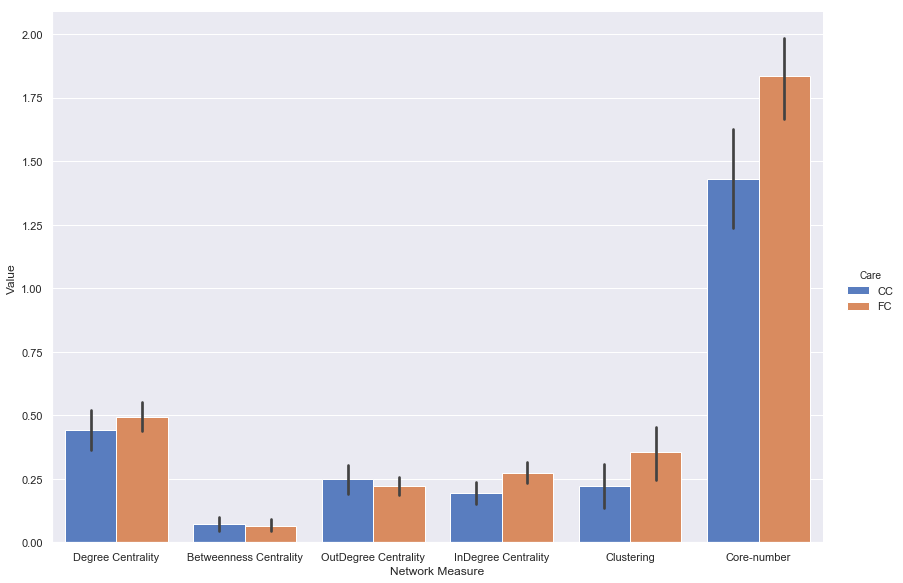

In [161]:
sns.set(font_scale=1)
g = sns.catplot("Network Measure", "Value", "Care General", data=df, kind="bar", palette="muted", legend=True, height=8.27, aspect=11.7/8.27)    
g._legend.set_title("Care")
g.set(xlabel='Network Measure', ylabel='Value')
g.set(xticklabels=['Degree Centrality', 'Betweenness Centrality', 'OutDegree Centrality', 'InDegree Centrality', 'Clustering', 'Core-number'])

plt.savefig('network_measure_value_CC_FC.png', bbox_inches='tight')
# Show plot
plt.show()

## Notes for plot
*Both male and female included.

Observations:

-In FC, Indegree (interactions to the individual) is larger than OutDegree (interactions from the individual) ---> **look into this**

-vice versa for the CC (Outdegree larger than InDegree)

-------------
A k-core is a maximal subgraph that contains nodes of degree k or more. The core number of a node is the largest value k of a k-core containing that node.
**-core-number larger in FC than CC** , look into below 


# Analyzing "core number"

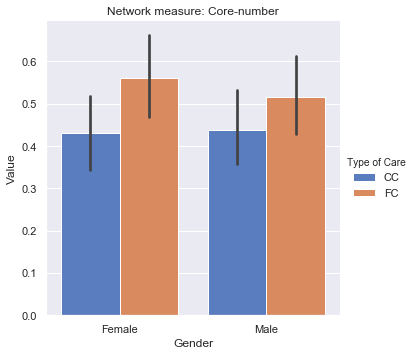

In [162]:
core_number_data = df.loc[(df['Network Measure'] == 'Core Number')]

g = sns.catplot("Gender", "Value", "Care General", data=df, kind="bar", palette="muted", legend=True)    
g._legend.set_title("Type of Care")
# g.set(xlabel='Network Measure', ylabel='Value')
# g.set(xticklabels=['Degree Centrality', 'Betweenness Centrality', 'OutDegree Centrality', 'InDegree Centrality', 'Clustering', 'Core-number'])
plt.title("Network measure: Core-number")
plt.savefig('./core_number_analysis/Care_gender_same.png', bbox_inches='tight')

plt.show()

## Notes for plot
No clear difference between male and female core-number measure

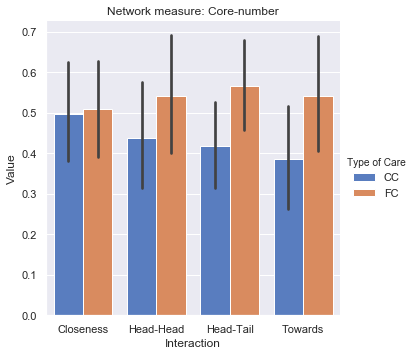

In [163]:
sns.set(font_scale=1)
core_number_data = df.loc[(df['Network Measure'] == 'Core Number')]

g = sns.catplot("Interaction", "Value", "Care General", data=df, kind="bar", palette="muted", legend=True)    
g._legend.set_title("Type of Care")
# g.set(xlabel='Network Measure', ylabel='Value')
# g.set(xticklabels=['Degree Centrality', 'Betweenness Centrality', 'OutDegree Centrality', 'InDegree Centrality', 'Clustering', 'Core-number'])
plt.title("Network measure: Core-number")
plt.savefig('./core_number_analysis/Care_interactions.png', bbox_inches='tight')
plt.show()

## Notes for plot
Closeness interaction similar between CC and FC 

FC is larger than CC in all other interactions

---------------------------------------------------------

---------------------------------------------------------

# Female vs Male on all network measures

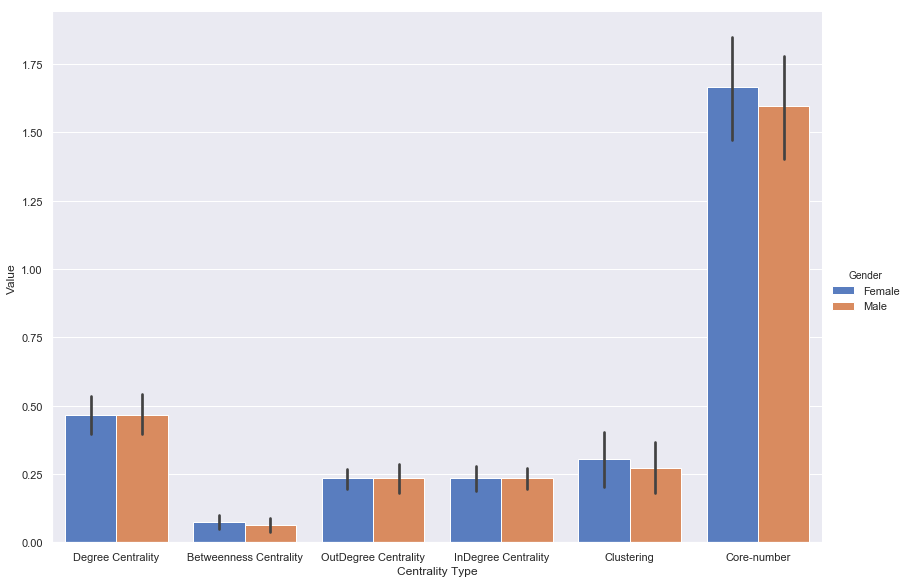

In [164]:
sns.set(font_scale=1)
g = sns.catplot("Network Measure", "Value", "Gender", data=df, kind="bar", palette="muted", legend=True, height=8.27, aspect=11.7/8.27)    
g._legend.set_title("Gender")
g.set(xlabel='Centrality Type', ylabel='Value')
g.set(xticklabels=['Degree Centrality', 'Betweenness Centrality', 'OutDegree Centrality', 'InDegree Centrality', 'Clustering', 'Core-number'])
# plt.savefig('female_male_centrality_same.png', bbox_inches='tight')
# Show plot
plt.show()

## Notes for plot
no difference in all network measures between male and female (except maybe core-number)

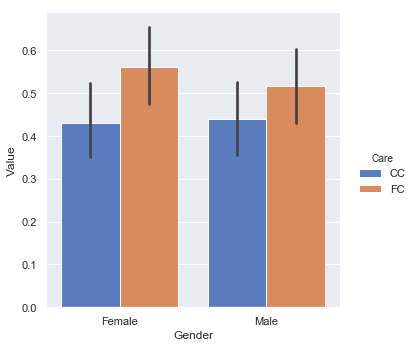

In [166]:
sns.set(font_scale=1)
g = sns.catplot("Gender", "Value", "Care General", data=df, kind="bar", palette="muted", legend=True)    
g._legend.set_title("Care")
g.set(xlabel='Gender', ylabel='Value')
# plt.savefig('female_male_centrality_care.png', bbox_inches='tight')
# Show plot
plt.show()

## Notes for plot
In general, FC has larger network measures than CC in both males and females.

But **remember** some of the network measures are correlated, and other network measures have different meanings. 


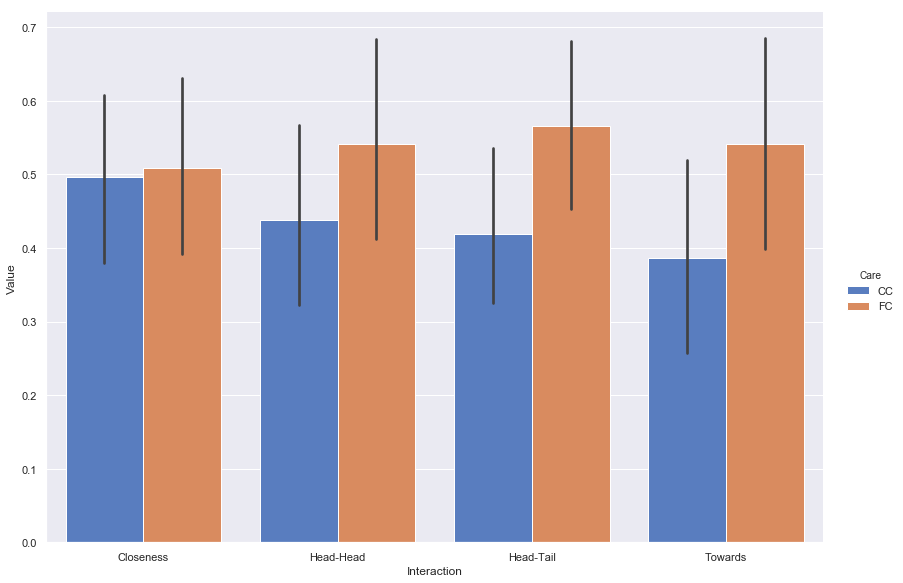

In [168]:
sns.set(font_scale=1)
g = sns.catplot("Interaction", "Value", "Care General", data=df, kind="bar", palette="muted", legend=True, height=8.27, aspect=11.7/8.27)    
g._legend.set_title("Care")
# plt.savefig('network_measure_value_CC_FC.png', bbox_inches='tight')
# Show plot
plt.show()

## Notes for plot
In general, FC has larger network measures than CC in all interactions (except for closeness).

But **remember** some of the network measures are correlated, and other network measures have different meanings. 